In [100]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv
/kaggle/input/new-york-city-taxi-fare-prediction/GCP-Coupons-Instructions.rtf
/kaggle/input/new-york-city-taxi-fare-prediction/test.csv
/kaggle/input/new-york-city-taxi-fare-prediction/train.csv


In [101]:
train=pd.read_csv('../input/new-york-city-taxi-fare-prediction/train.csv',nrows=1000000)
test=pd.read_csv('../input/new-york-city-taxi-fare-prediction/test.csv')

In [102]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [103]:
train.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64

In [104]:
train=train.drop(train[train.isnull().any(1)].index)
train.shape

(999990, 8)

In [105]:
test.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [106]:
train['key'].head()

0      2009-06-15 17:26:21.0000001
1      2010-01-05 16:52:16.0000002
2     2011-08-18 00:35:00.00000049
3      2012-04-21 04:30:42.0000001
4    2010-03-09 07:51:00.000000135
Name: key, dtype: object

In [107]:
import datetime as dt
train[['key','pickup_datetime','fare_amount']]

,key,pickup_datetime,fare_amount
0,2009-06-15 17:26:21.0000001,2009-06-15 17:26:21 UTC,4.5
1,2010-01-05 16:52:16.0000002,2010-01-05 16:52:16 UTC,16.9
2,2011-08-18 00:35:00.00000049,2011-08-18 00:35:00 UTC,5.7
3,2012-04-21 04:30:42.0000001,2012-04-21 04:30:42 UTC,7.7
4,2010-03-09 07:51:00.000000135,2010-03-09 07:51:00 UTC,5.3
...,...,...,...
999995,2014-09-13 21:44:38.0000001,2014-09-13 21:44:38 UTC,7.0
999996,2010-09-20 14:50:37.0000002,2010-09-20 14:50:37 UTC,7.3
999997,2013-04-26 14:03:00.000000118,2013-04-26 14:03:00 UTC,10.5
999998,2011-07-08 00:29:00.00000099,2011-07-08 00:29:00 UTC,6.9


In [108]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000
mean,11.347953,-72.526699,39.929040,-72.527860,39.919954,1.684941
std,9.821790,12.057778,7.626087,11.324494,8.201418,1.323907
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [109]:
train.drop(train[train['fare_amount']<0].index,inplace=True)
train.shape

(999952, 8)

In [110]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999952.000000,999952.000000,999952.000000,999952.000000,999952.000000,999952.000000
mean,11.348616,-72.526719,39.929050,-72.528101,39.920086,1.684942
std,9.821249,12.057786,7.626126,11.323777,8.201183,1.323908
min,0.000000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734047,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967095,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [111]:
train=train.drop(train[(train['pickup_latitude']>90)|(train['pickup_latitude']<-90)|
                 (train['dropoff_latitude']<-90)|(train['dropoff_latitude']>90)].index)

In [112]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999932.000000,999932.000000,999932.000000,999932.000000,999932.000000,999932.000000
mean,11.348595,-72.525359,39.926771,-72.521567,39.925893,1.684952
std,9.821277,10.693034,6.089306,10.626949,6.093670,1.323914
min,0.000000,-1452.988333,-74.016587,-1329.621332,-74.035197,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734047,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753165,1.000000
75%,12.500000,-73.967095,40.767153,-73.963654,40.768128,2.000000
max,500.000000,40.850357,69.400000,45.581619,81.510177,208.000000


In [113]:
train=train.drop(train[(train['pickup_longitude']>180)|(train['pickup_longitude']<-180)
                       |(train['dropoff_longitude']<-180)|(train['dropoff_longitude']>180)].index,axis=0)

In [114]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999912.000000,999912.000000,999912.000000,999912.000000,999912.000000,999912.000000
mean,11.348589,-72.517323,39.926754,-72.515465,39.925998,1.684940
std,9.821234,10.393533,6.089366,10.396548,6.093337,1.323897
min,0.000000,-128.175950,-74.016587,-121.391248,-74.035197,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734047,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967095,40.767153,-73.963654,40.768128,2.000000
max,500.000000,40.850357,69.400000,45.581619,81.510177,208.000000


In [115]:
train['passenger_count'].value_counts()

1      691284
2      148101
5       70589
3       43761
4       21428
6       21193
0        3555
208         1
Name: passenger_count, dtype: int64

In [116]:
train=train.drop(train[train['passenger_count']==208].index)

In [117]:
train.shape

(999911, 8)

In [118]:
train['key']=pd.to_datetime(train['key'])
train['pickup_datetime']=pd.to_datetime(train['pickup_datetime'])

    

In [119]:
def harvesine(lat1,long1,lat2,long2):
    data=[train,test]
    R=6371
    for i in data:
        la1=np.radians(i[lat1])
        la2=np.radians(i[lat2])
        del_phi=la2-la1
        del_lam=np.radians(i[long2]-i[long1])
        a=np.sin(del_phi/2)**2 +np.cos(la1)*np.cos(la2)*np.sin(del_lam/2)**2
        c=2*np.arctan2(np.sqrt(a),np.sqrt(1-a))
        d=R*c
        i['HarvesianDistance']=d
harvesine('pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude')

In [120]:
train['HarvesianDistance'].head(10)

0    1.030764
1    8.450134
2    1.389525
3    2.799270
4    1.999157
5    3.787239
6    1.555807
7    4.155444
8    1.253232
9    2.849627
Name: HarvesianDistance, dtype: float64

In [121]:
test['key']=pd.to_datetime(test['key'])
test['pickup_datetime']=pd.to_datetime(test['pickup_datetime'])

In [122]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,HarvesianDistance
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [123]:
data = [train,test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

(array([  3555.,      0., 691284.,      0.,      0., 148101.,      0.,
             0.,  43761.,      0.,  21428.,      0.,      0.,  70589.,
             0.,  21193.]),
 array([0.   , 0.375, 0.75 , 1.125, 1.5  , 1.875, 2.25 , 2.625, 3.   ,
        3.375, 3.75 , 4.125, 4.5  , 4.875, 5.25 , 5.625, 6.   ]),
 <a list of 16 Patch objects>)

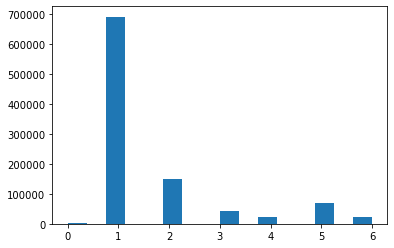

In [124]:
plt.hist(train['passenger_count'],bins=16)

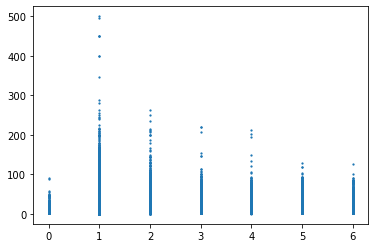

In [125]:
plt.scatter(x=train['passenger_count'],y=train['fare_amount'],s=1.5)


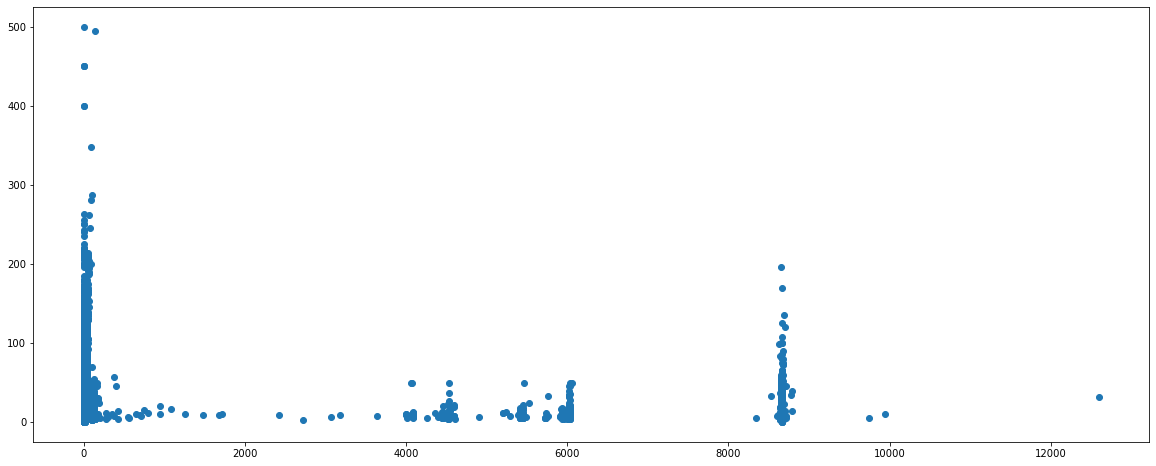

In [126]:
plt.figure(figsize=(20,8))
plt.scatter(train['HarvesianDistance'],train['fare_amount'])

In [127]:
train=train.drop(train[(train['HarvesianDistance']==0) & (train['fare_amount']==0)].index)

In [128]:

plt.figure(figsize=(18,8))
train[train['fare_amount']>400]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,HarvesianDistance,Year,Month,Date,Day of Week,Hour
101885,2011-09-12 09:33:56.000000400,500.0,2011-09-12 09:33:56+00:00,-73.965961,40.640595,-73.965961,40.640595,1,0.000000,2011,9,12,0,9
233874,2012-10-28 14:14:44.000000100,450.0,2012-10-28 14:14:44+00:00,-73.931985,40.793829,-73.929148,40.799672,1,0.692212,2012,10,28,6,14
247671,2015-05-12 13:16:47.000000400,495.0,2015-05-12 13:16:47+00:00,-73.814911,40.699562,-72.196091,41.012253,1,140.514983,2015,5,12,1,13
287638,2015-03-11 16:25:21.000000700,450.0,2015-03-11 16:25:21+00:00,-73.909019,40.777611,-73.908997,40.777607,1,0.001973,2015,3,11,2,16
329010,2011-07-29 14:19:00.000000200,450.0,2011-07-29 14:19:00+00:00,-73.955373,40.810310,-73.955372,40.810323,1,0.001448,2011,7,29,4,14


<Figure size 1296x576 with 0 Axes>

In [129]:
longdist=train[(train['HarvesianDistance']>200)]
train.fare_amount.dtype

dtype('float64')

In [130]:
longdist['HarvesianDistance']=longdist.apply(lambda x : (x['fare_amount']- 2.5)/1.56,axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [131]:
train.update(longdist)

In [132]:
train[(train['HarvesianDistance']==0)].shape

(28663, 14)

In [133]:
train=train.drop(train[(train['Hour']>=6) & (train['Hour']<=20) & (train['HarvesianDistance']==0) & (train['fare_amount']<2.5)].index)

In [134]:
train[(train['HarvesianDistance']==0) & ((train['Hour']>20)|(train['Hour']<6)) & ((train['Day of Week']>=1)&(train['Day of Week']<=5))&(train['fare_amount']<3)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,HarvesianDistance,Year,Month,Date,Day of Week,Hour
376,2014-05-29 05:57:22.000000100,2.5,2014-05-29 05:57:22+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2014.0,5.0,29.0,3.0,5.0
503,2010-01-19 01:10:00.000000120,2.5,2010-01-19 01:10:00+00:00,-73.998720,40.624708,-73.998720,40.624708,1.0,0.0,2010.0,1.0,19.0,1.0,1.0
657,2009-08-25 01:50:21.000000100,2.5,2009-08-25 01:50:21+00:00,-73.986410,40.763350,-73.986410,40.763350,1.0,0.0,2009.0,8.0,25.0,1.0,1.0
3168,2012-07-06 22:07:00.000000111,2.5,2012-07-06 22:07:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2012.0,7.0,6.0,4.0,22.0
12953,2010-07-23 03:30:08.000000100,2.9,2010-07-23 03:30:08+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2010.0,7.0,23.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981827,2013-07-11 01:24:12.000000100,2.5,2013-07-11 01:24:12+00:00,-73.989207,40.718738,-73.989207,40.718738,1.0,0.0,2013.0,7.0,11.0,3.0,1.0
982760,2013-08-15 02:36:09.000000200,2.5,2013-08-15 02:36:09+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2013.0,8.0,15.0,3.0,2.0
991940,2009-11-18 23:23:55.000000200,2.5,2009-11-18 23:23:55+00:00,-73.982666,40.756720,-73.982666,40.756720,1.0,0.0,2009.0,11.0,18.0,2.0,23.0
994174,2015-03-19 21:34:53.000000700,2.5,2015-03-19 21:34:53+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2015.0,3.0,19.0,3.0,21.0


In [135]:
x=train[(train['HarvesianDistance']!=0) & (train['fare_amount']==0)]

In [136]:
x['fare_amount']=x.apply(lambda x : (x['HarvesianDistance']*1.56 + 2.50),axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [137]:
train.update(x)

In [138]:
train.shape

(999905, 14)

In [139]:
train['TripCancelled']=0
test['TripCancelled']=0
train.loc[(train['fare_amount']!=0)&(train['HarvesianDistance']==0),'TripCancelled']=1
test.loc[(test['HarvesianDistance']==0),'TripCancelled']=1

In [140]:
train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'HarvesianDistance', 'Year', 'Month', 'Date',
       'Day of Week', 'Hour', 'TripCancelled'],
      dtype='object')

In [145]:
train=train.drop(['key','pickup_datetime'],axis=1)


KeyError: "['key' 'pickup_datetime'] not found in axis"

In [146]:
y_train=train['fare_amount']
train=train.drop('fare_amount',axis=1)


KeyError: 'fare_amount'

In [151]:
test=test.drop(['key','pickup_datetime'],axis=1)


In [152]:
test.shape

(9914, 12)

In [153]:
import xgboost as xgb
import lightgbm as lgbm
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestRegressor()
params={'n_estimators': [100,200,500], 'max_depth':[4,5,6,8]}
gscv=GridSearchCV(estimator=rf,param_grid=params,cv=10)
gscv.fit(train,y_train)